# CLUSTER ANALYSIS Example: 
A survey was done to study the importance attached to the various
performance components of outsourced activities by the customers of an ITeS
organization. The customers were asked to express the importance they attach to
the following statements on a 7 point scale (1: least important, 7: most important).
Is it possible to group customers with similar opinion
x1: Ability to deliver seamlessly in the event of change (volume fluctuation,
resource movements, etc)
x2: Application of process knowledge
x3: Flexibility and responsiveness to special service requests
x4: Communication with the customer
x5: Ability to meet service level requirements
x6: Effectiveness in handling escalations

In [1]:
#Import the packages
import pandas as mypd
import matplotlib.pyplot as myplot
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

In [2]:
#Import the data
mydata=mypd.read_excel('D:/Python_ISI/data/Cluster_Analysis_Example.xlsx')

In [3]:
#Explore the data
mydata.head()

,Customer No,x1,x2,x3,x4,x5,x6
0,1,2,3,2,4,7,2
1,2,4,6,4,5,3,6
2,3,2,2,1,5,4,4
3,4,2,3,1,4,5,4
4,5,3,5,4,6,4,7


In [4]:
#Clean up the data
mydata=mydata.iloc[:,1:7]
mydata.head()

,x1,x2,x3,x4,x5,x6
0,2,3,2,4,7,2
1,4,6,4,5,3,6
2,2,2,1,5,4,4
3,2,3,1,4,5,4
4,3,5,4,6,4,7


In [5]:
#Compute the distance/Linkage matrix
mylinkage=linkage(mydata,method='ward')

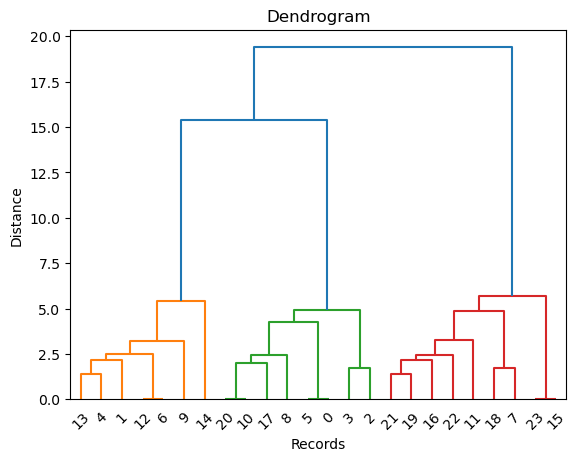

In [6]:
#Dendrogram
#myplot.figure(figsize=(10,7))
dendrogram(mylinkage,distance_sort='descending')
myplot.title('Dendrogram')
myplot.xlabel("Records")
myplot.ylabel('Distance')
myplot.show()

In [7]:
#Develope KMean cluster
mymodel=KMeans(n_clusters=3)

In [8]:
#Fit KMeans to the data
mymodel=mymodel.fit(mydata)

In [9]:
#Cluster Membership
clusterid=mymodel.predict(mydata)

In [10]:
clusterid=mypd.DataFrame(clusterid,columns=['Cluster'])

In [11]:
myresult=mydata.join(clusterid)

In [12]:
myresult

,x1,x2,x3,x4,x5,x6,Cluster
0,2,3,2,4,7,2,2
1,4,6,4,5,3,6,0
2,2,2,1,5,4,4,2
3,2,3,1,4,5,4,2
4,3,5,4,6,4,7,0
5,2,3,2,4,7,2,2
6,3,5,3,6,4,6,0
7,7,3,7,4,1,4,1
8,2,4,3,3,6,3,2
9,4,6,3,7,2,7,0


In [13]:
#Export the cluster output
myresult.to_excel('D:/Python_ISI/Cluster_result.xlsx')

In [14]:
#Compute cluster centers
myclusters=mymodel.cluster_centers_
myclusters=mypd.DataFrame(myclusters)

In [15]:
round(myclusters,2)

,0,1,2,3,4,5
0,3.43,5.71,3.29,6.00,3.57,6.00
1,5.78,3.78,5.78,3.00,1.78,3.89
2,1.62,3.00,1.88,3.38,5.75,3.25


In [16]:
#Computation Silhouette width
mymodel=KMeans(n_clusters=4,random_state=50)
mymodel=mymodel.fit(mydata)

In [17]:
#Compute cluster id
clusterid=mymodel.predict(mydata)

In [18]:
#Overall Silhouette Width
silhouette_avg=silhouette_score(mydata,clusterid)

In [19]:
round(silhouette_avg,4)

0.4951

In [20]:
#Sample Silhouette Width
silhouette_values=silhouette_samples(mydata,clusterid)

In [21]:
silhouette_values=mypd.DataFrame(silhouette_values,columns=['Silhouette Value'])

In [22]:
silhouette_values.min()

Silhouette Value    0.0
dtype: float64

C:\Users\Anannya\anaconda31\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


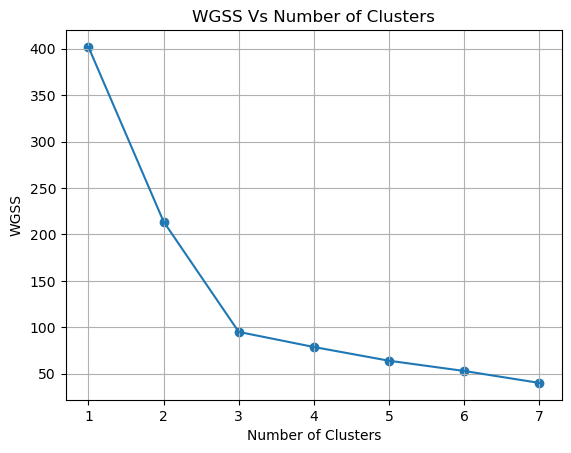

In [23]:
#Plot of Within group sumofsquares(wgss) vs n0. of cluster
wgss=[]
K=range(1,8)
#For loop
for k in K:
    mymodel=KMeans(n_clusters=k)
    mymodel=mymodel.fit(mydata)
    wgss.append(mymodel.inertia_)
    
    
myplot.scatter(K,wgss)
myplot.plot(K,wgss)
myplot.title('WGSS Vs Number of Clusters')
myplot.xlabel('Number of Clusters')
myplot.ylabel('WGSS')
myplot.grid()
myplot.show()